# Import Libraries

importing the necessary libraries for data manipulation, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load and Preprocess Data

Load the dataset (train_user) and perform basic preprocessing steps.

In [3]:
# Load the dataset
data = pd.read_csv('../data/train_user.csv')

# Handle missing values
data.fillna(-1, inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['language'] = encoder.fit_transform(data['language'])

# Select features and target
X = data[['age', 'gender', 'language']]
y = data['country_destination']

# Split Data into Training and Testing Sets

Split your data into training and testing sets to evaluate your model's performance.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training:

Train a Random Forest Classifier using the training data.

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation/Validation

Evaluate the model's performance on the testing data.

In [6]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.7063794779747214
Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0   77    0]
 [   0    0    0    0    0    0    0    0    0  225    0]
 [   0    0    0    1    0    0    0    0    0  169    1]
 [   0    0    0    0    0    0    1    0    0  343    2]
 [   0    0    0    0    1    1    1    0    0  711    3]
 [   0    0    0    0    0    0    0    0    0  340    0]
 [   0    0    1    0    0    1    0    0    0  380    0]
 [   0    0    0    0    0    0    0    0    0  112    0]
 [   0    1    0    0    0    0    0    0    0   32    0]
 [   1    0    4    5   10    5    6    1    0 9439   24]
 [   0    0    0    0    3    0    0    0    0 1465    5]]


# Predictions

You can now use your trained model to make predictions for new data.

In [7]:
new_data = pd.DataFrame({'age': [50], 'gender': [1], 'language': [8]})
predicted_country = model.predict(new_data)
print(f'Predicted Country: {predicted_country[0]}')

Predicted Country: ES


# Visualization 

create visualizations to better understand your model's predictions and performance.

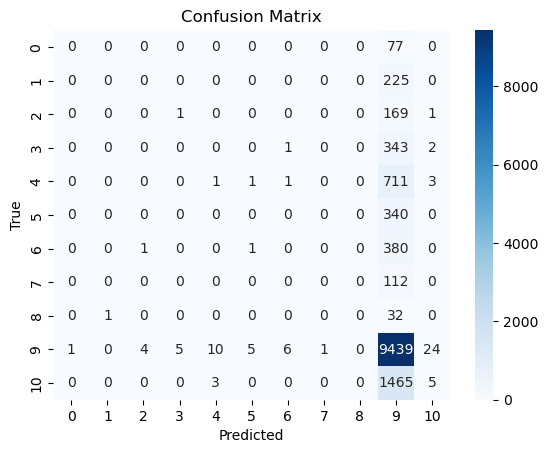

In [8]:
# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()